In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/text/data.csv")
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
data['class']=data['class'].replace({'suicide':'depressed','non-suicide':'non-depressed'})

In [ ]:
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,depressed
1,3,Am I weird I don't get affected by compliments...,non-depressed
2,4,Finally 2020 is almost over... So I can never ...,non-depressed
3,8,i need helpjust help me im crying so hard,depressed
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",depressed


In [ ]:
import numpy as np
df = np.array_split(data, 5)[1]

In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46415 entries, 46415 to 92829
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  46415 non-null  int64 
 1   text        46415 non-null  object
 2   class       46415 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
None
(46415, 3)


In [ ]:
df.head()

,Unnamed: 0,text,class
46415,69527,I don’t know what to do anymoreI have always b...,depressed
46416,69528,Feeling lost and ashamedHi. For a while now I'...,depressed
46417,69529,"Anybody want to talk, I’m kinda sad Just in ne...",non-depressed
46418,69530,"I seriously feel like a shell, Everyday is a s...",depressed
46419,69532,Im gonna drink vodka till i dieWhat are the mo...,depressed


In [ ]:
df=df.rename(columns={'class':'label'})
df.head()

,Unnamed: 0,text,label
46415,69527,I don’t know what to do anymoreI have always b...,depressed
46416,69528,Feeling lost and ashamedHi. For a while now I'...,depressed
46417,69529,"Anybody want to talk, I’m kinda sad Just in ne...",non-depressed
46418,69530,"I seriously feel like a shell, Everyday is a s...",depressed
46419,69532,Im gonna drink vodka till i dieWhat are the mo...,depressed


depressed        23281
non-depressed    23134
Name: label, dtype: int64

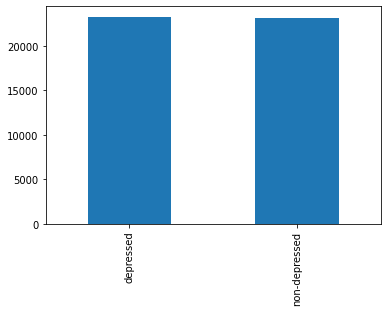

In [ ]:
df.label.value_counts().plot(kind='bar')
df.label.value_counts()

In [ ]:
#Text Preprocessing

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def lower(text):
  return str.lower(text)

def punct(text):
  l=[]
  for word in text:
    if word not in punctuation:
      l.append(word)
  return "".join(l)

def stop(text):
  l=[]
  for word in text.split():
    if word not in stopwords:
      l.append(word)
  return " ".join(l)

def remove(text):
  reg=[r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',r'Subject:', r'Re:']
  for r in reg:
    text=re.sub(r,'',text)
  return text

def lemmatizer(text):
  l=[]
  for word in text:
    l.append(wordnet_lemmatizer.lemmatize(word))
  return " ".join(l)
def remove_num(text):
  return ' '.join(re.findall("[a-zA-Z]+", text))

In [ ]:
df['text'] = df.text.apply(lambda x : lower(x))
df['text'] = df.text.apply(lambda x : punct(x))
df['text'] = df.text.apply(lambda x : stop(x))
df['text'] = df.text.apply(lambda x : remove(x))
df['text'] = df.text.apply(lambda x : word_tokenize(x))
df['text'] = df.text.apply(lambda x : lemmatizer(x))
df['text'] = df.text.apply(lambda x : remove_num(x))

In [ ]:
df.head()

,Unnamed: 0,text,label
46415,69527,don t know anymorei always introvert ever goin...,depressed
46416,69528,feeling lost ashamedhi ive feeling hopeless un...,depressed
46417,69529,anybody want talk i m kinda sad need company s...,non-depressed
46418,69530,seriously feel like shell everyday strugglei m...,depressed
46419,69532,im gon na drink vodka till diewhat toxic alcoh...,depressed


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
x_train=train['text']
y_train=train['label']
x_test=test['text']
y_test=test['label']

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37132,), (37132,), (9283,), (9283,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(analyzer = "word", max_features=10000)
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

In [ ]:
x_train.shape,x_test.shape

((37132, 10000), (9283, 10000))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
x_train = normalizer.fit_transform(x_train.toarray())
x_test = normalizer.transform(x_test.toarray())

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
svc = LinearSVC(C=1, penalty='l1', max_iter=500, dual=False)
svc.fit(x_train, y_train)
selector = SelectFromModel(svc, prefit=True)
x_train = selector.transform(x_train)
x_test = selector.transform(x_test)

In [ ]:
x_train.shape,x_test.shape

((37132, 4953), (9283, 4953))

In [ ]:
import pickle
pickle.dump(vector,open('/content/drive/MyDrive/text/models/vector.pkl','wb'))
pickle.dump(normalizer,open('/content/drive/MyDrive/text/models/normalizer.pkl','wb'))
pickle.dump(selector,open('/content/drive/MyDrive/text/models/selector.pkl','wb'))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
def results(model):
  plot_confusion_matrix(model,x_test,y_test,cmap='Blues')
  print(classification_report(y_test, model.predict(x_test), target_names=model.classes_))

In [ ]:
#no_run
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import pickle
mb = MultinomialNB()
mb.fit(x_train, y_train)
  
pickle.dump(mb, open("/content/drive/MyDrive/text/models/mb.pkl"  , 'wb'))

In [ ]:
#no_run
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', solver = 'liblinear', C=1, penalty = 'l2')
lr.fit(x_train, y_train)

pickle.dump(lr, open("/content/drive/MyDrive/text/models/lr.pkl"  , 'wb'))

In [ ]:
import sys
import os
import site
sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))
!pip install scikit-learn-intelex

     |████████████████████████████████| 69 kB 5.3 MB/s 
     |████████████████████████████████| 22.5 MB 1.4 MB/s 
     |████████████████████████████████| 284.3 MB 1.4 kB/s 
     |████████████████████████████████| 4.0 MB 37.5 MB/s 


In [ ]:
from sklearn.naive_bayes import ComplementNB
import pickle
cb = ComplementNB()
cb.fit(x_train, y_train)
  
pickle.dump(cb, open("/content/drive/MyDrive/text/models/cb.pkl"  , 'wb'))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Multinomial Naive Bayes
Accuracy = 90.19 %
               precision    recall  f1-score   support

    depressed       0.87      0.95      0.91      4686
non-depressed       0.94      0.85      0.90      4597

     accuracy                           0.90      9283
    macro avg       0.91      0.90      0.90      9283
 weighted avg       0.91      0.90      0.90      9283

Logistic Regression
Accuracy = 93.08 %
               precision    recall  f1-score   support

    depressed       0.94      0.92      0.93      4686
non-depressed       0.92      0.94      0.93      4597

     accuracy                           0.93      9283
    macro avg       0.93      0.93      0.93      9283
 weighted avg       0.93      0.93      0.93      9283

Complement Naive Bayes
Accuracy = 90.21 %
               precision    recall  f1-score   support

    depressed       0.87      0.95      0.91      4686
non-depressed       0.94      0.86      0.90      4597

     accuracy                           0.9

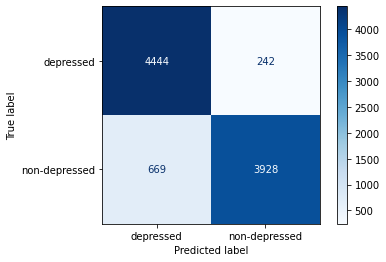

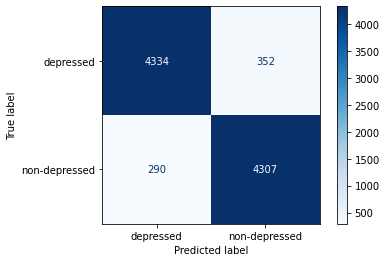

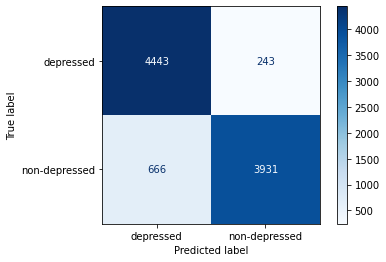

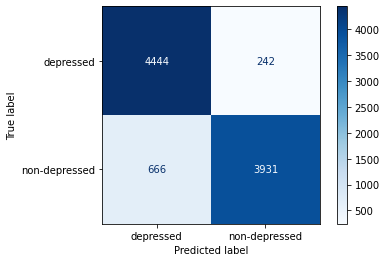

In [ ]:
from sklearn.ensemble import VotingClassifier
import pickle
from sklearnex import patch_sklearn 
patch_sklearn()

models=[]
mb = pickle.load(open("/content/drive/MyDrive/text/models/mb.pkl", 'rb'))
predictions = mb.predict(x_test)
print("Multinomial Naive Bayes")
print("Accuracy = %0.2f" % (accuracy_score(y_test, predictions)*100),'%')
results(mb)

lr = pickle.load(open("/content/drive/MyDrive/text/models/lr.pkl", 'rb'))
predictions = lr.predict(x_test)
print("Logistic Regression")
print("Accuracy = %0.2f" % (accuracy_score(y_test, predictions)*100),'%')
results(lr)

cb = pickle.load(open("/content/drive/MyDrive/text/models/cb.pkl", 'rb'))
predictions = cb.predict(x_test)
print("Complement Naive Bayes")
print("Accuracy = %0.2f" % (accuracy_score(y_test, predictions)*100),'%')
results(cb)

models.append(('MultinomialNB', mb))
models.append(('LogisticRegression', lr))
models.append(('ComplementNB',cb))

voting = VotingClassifier(estimators=models)
voting.fit(x_train, y_train)
predictions = voting.predict(x_test)
print("Combined Models")
print("Accuracy = %0.2f" % (accuracy_score(y_test, predictions)*100),'%')
results(voting)

pickle.dump(voting, open("/content/drive/MyDrive/text/models/voting.pkl",'wb'))